### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the quality of milk. You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

**Import Necessary Libraries**

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Task 1: Data Preparation and Exploration

1. Import the data from the `"milk_quality_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the target variable `grade` by mapping it to numbers `(low = 0, medium = 1, high = 2)`.
6. Visualize the distribution of key features `(ph, temperature)` using histograms.

In [5]:
# Step 1: Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'

df=pd.read_csv("milk_quality_data.csv")

# Step 2: Display the number of rows and columns in the dataset

df.shape
# Step 3: Display the first few rows of the dataset to get an overview
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
df.isnull().sum()

,0
ph,0
temperature,0
taste,0
odor,0
fat,0
turbidity,0
colour,0
grade,0


In [13]:
# Step 5: Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
# Step 1: Import the data from the "milk_quality_data.csv" file and store it in a variable 'df'
df = pd.read_csv("milk_quality_data.csv")

# Step 5: Encode the target variable 'grade' by mapping it to numbers ('low' = 0, 'medium' = 1, 'high' = 2)
df['grade'] = df['grade'].map({'low': 0, 'medium': 1, 'high': 2})

# Display the first few rows to verify the encoding
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


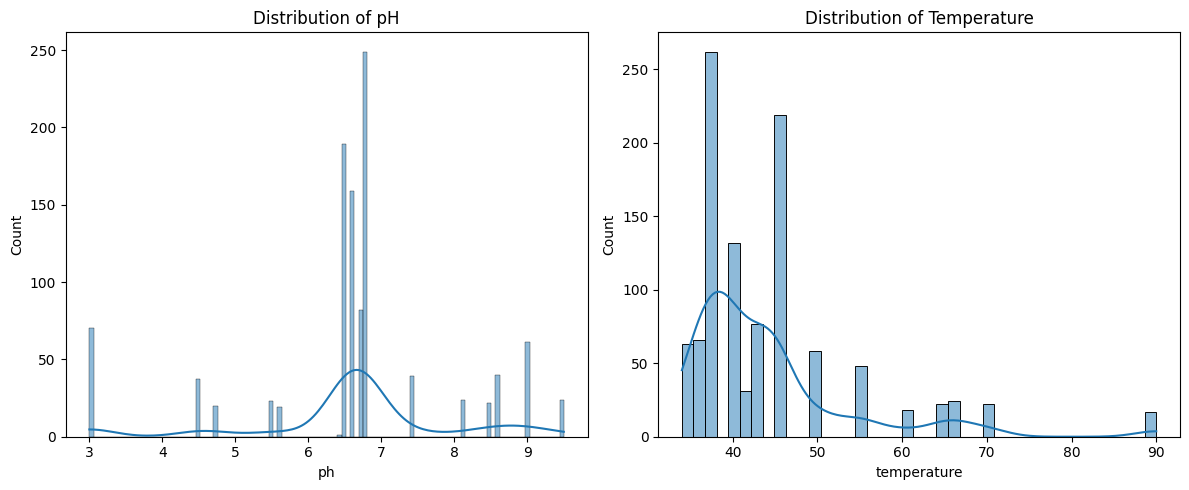

In [18]:
# Step 6: Visualize the distribution of key features ('ph', 'temperature') using histograms

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['ph'], kde=True)
plt.title('Distribution of pH')

plt.subplot(1, 2, 2)
sns.histplot(df['temperature'], kde=True)
plt.title('Distribution of Temperature')

plt.tight_layout()
plt.show()

### Task 2: Model Training Using Basic Models

1. Select the features `(ph, temperature, taste, odor, fat, turbidity, colour)` and the target variable `(grade)` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Logistic Regression model using the training data.
4. Print the model's accuracy score on test data.
5. Initialize and train a Decision Tree Classifier using the training data.
6. Print the model's accuracy score on test data.

In [33]:
from sklearn.model_selection import train_test_split

# Step 1: Select the features and target variable for modeling
X = df[['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour']]
y = df['grade']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Step 3: Initialize and train a Logistic Regression model using the training data
model_selection=LogisticRegression()
model_selection.fit(X_train,y_train)
# Step 4: Print the model's accuracy score on test data.
print(accuracy_score(y_test,model_selection.predict(X_test)))

0.6981132075471698


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Step 5: Initialize and train a Decision Tree Classifier using the training data
model_selection=DecisionTreeClassifier()
model_selection.fit(X_train,y_train)
# Step 6: Print the model's accuracy score on test data.
print(accuracy_score(y_test,model_selection.predict(X_test)))




0.9937106918238994


### Task 3: Model Training Using Advanced Models

1. Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data.
2. Print the model's accuracy score on test data.
3. Initialize and train an XGBoost Classifier with 50 estimators using the training data.
4. Print the model's accuracy score on test data.

In [26]:
# Step 1: Initialize and train a Gradient Boosting Classifier with 50 estimators using the training data
from sklearn.ensemble import GradientBoostingClassifier
model_selection=GradientBoostingClassifier(n_estimators=50)
model_selection.fit(X_train,y_train)

# Step 2: Print the model's accuracy score
print(accuracy_score(y_test,model_selection.predict(X_test)))

0.9905660377358491


In [28]:
# Step 3: Initialize and train an XGBoost Classifier with 50 estimators using the training data
from xgboost import XGBClassifier
model_selection=XGBClassifier(n_estimators=50)
model_selection.fit(X_train,y_train)

# Step 4: Print the model's accuracy score
print(accuracy_score(y_test,model_selection.predict(X_test)))

0.9968553459119497


### Task 4: Experiment with Hyperparameters in XGBoost

1. Train the XGBoost model with the following parameters
    - n_estimators=100
    - max_depth=5
    - learning_rate=0.1
    - colsample_bytree=0.5. :
    colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.



Learn about these parameters here: [XgboostClassifier Parameters](https://xgboost.readthedocs.io/en/stable/parameter.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Evaluate the model's performance using accuracy score and print it.
3. Print the classification report and confusion matrix for the model.

In [30]:
# Step 1: Train the XGBoost model with n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5
model_selection=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.1,colsample_bytree=0.5)
model_selection.fit(X_train,y_train)

# Step 2: Evaluate the model's performance using accuracy score and print it
print(accuracy_score(y_test,model_selection.predict(X_test)))

0.9968553459119497


In [32]:
# Step 3: Print the classification report and confusion matrix for the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,model_selection.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       1.00      1.00      1.00       127
           2       0.99      1.00      0.99        76

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



XGBOOST REGRESSION EXAMPLE

In [35]:
# Import libraries
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (California housing dataset)
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:

# Initialize XGBoost Regressor
xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",  # loss function
    n_estimators=100,              # number of trees
    learning_rate=0.1,             # step size
    max_depth=4,                   # depth of each tree
    random_state=42
)

# Fit model
xgb_reg.fit(X_train, y_train)

# Predictions
y_pred = xgb_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.26275762775016454
R² Score: 0.7994842586450439
